## Import libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn import datasets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Load Iris Dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
X_iris = iris.data[:,(2,3)]
y_iris = iris.target
print(('Class labels:', np.unique(y_iris)))

('Class labels:', array([0, 1, 2]))


In [22]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Stratified train-test split with Sklearn

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size = 0.3, \
                                                          stratify = y_iris, random_state = 42)

# Let´s see the use of stratify, applicable only to classification tasks
# in order to balance the datasets

# Feature Standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))


In [4]:
print(X_combined_scaled.shape)
print()
print(y_combined.shape)

(150, 2)

(150,)


## Testing Several Classification Algorithms over the Iris Dataset

### Logistic Regression

Here we are going to test the LogisticRegression model from Sklearn to extract their predictions ('predict' method) and their probabilities ('predict_proba' method with different C regularization parameters.

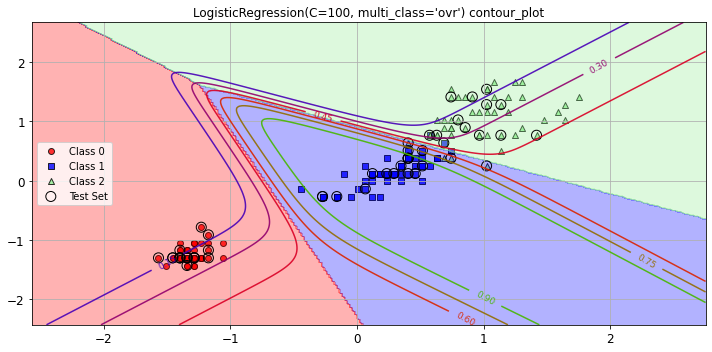

In [5]:
from sklearn.linear_model import LogisticRegression
from plot_decision_regions import plot_decision_regions

log_reg_ovr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'ovr')
log_reg_ovr.fit(X_train_scaled, y_train)

plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = log_reg_ovr,
                     test_idx = range(100,150))

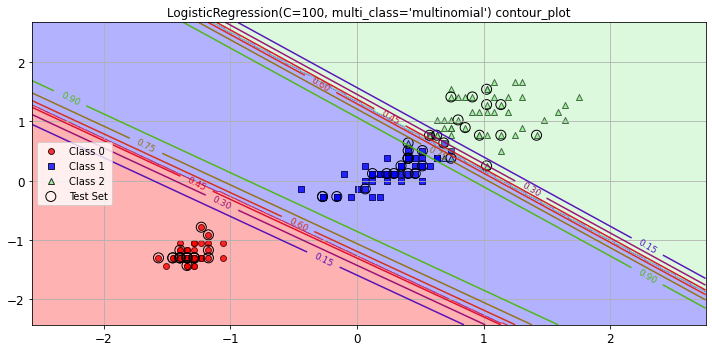

In [6]:
# Now let´s try with the 'multinomial' default option from Sklearn
log_reg_multi = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
log_reg_multi.fit(X_train_scaled, y_train)

plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = log_reg_multi,
                     test_idx = range(100,150))

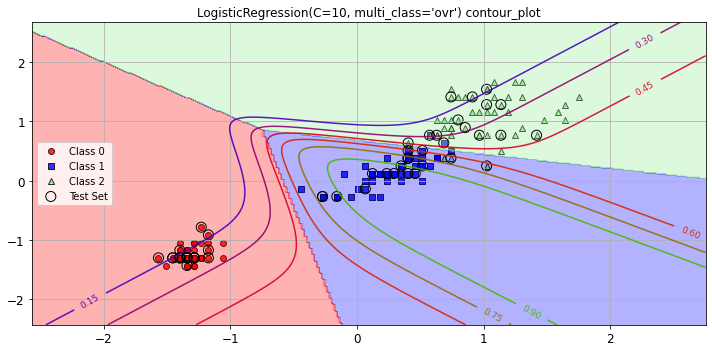

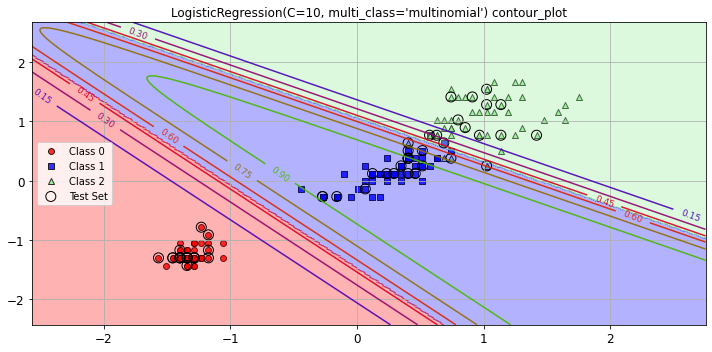

In [7]:
# Changing regularization parameter from C = 100 to C = 10, 
# decreasing C means that we are increasing the regularization strength.

log_reg_ovr = LogisticRegression(C = 10, solver = 'lbfgs', multi_class = 'ovr')
log_reg_ovr.fit(X_train_scaled, y_train)

plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = log_reg_ovr,
                     test_idx = range(100,150))

# Now let´s try with the 'multinomial' default option from Sklearn
log_reg_multi = LogisticRegression(C = 10, solver = 'lbfgs', multi_class = 'multinomial')
log_reg_multi.fit(X_train_scaled, y_train)

plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = log_reg_multi,
                     test_idx = range(100,150))

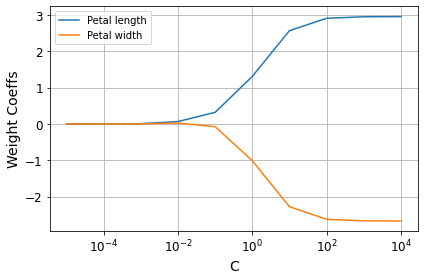

In [8]:
# The effect of the regularization will be shown now:

weights, params = [],[]

for c in range(-5,5):
    lr_ovr = LogisticRegression(C = 10.**c, multi_class = 'ovr', solver = 'lbfgs')
    lr_ovr.fit(X_train_scaled, y_train)
    weights.append(lr_ovr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:,0], label = 'Petal length')
plt.plot(params, weights[:,1], label = 'Petal width')
plt.xlabel('C')
plt.ylabel('Weight Coeffs')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

### Support Vector Machines (SVM, SVC)

#### A Linear Classifier with SVC

In [9]:
from sklearn.svm import SVC

svm_lin = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm_linear = svm_lin.fit(X_train_scaled, y_train)

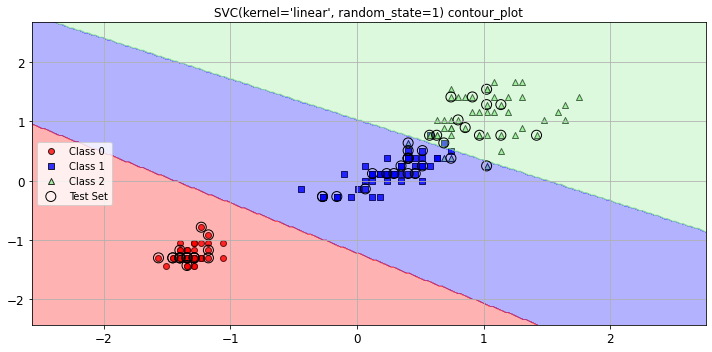

In [10]:
# Note SVM classifiers do not output probabilities like Logistic ones
plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = svm_linear,
                     test_idx = range(100,150))

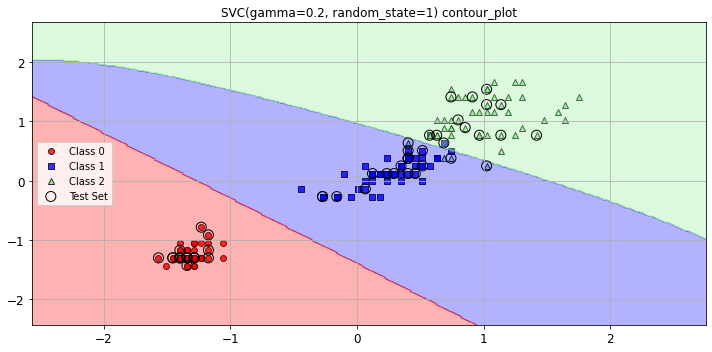

In [11]:
# A RBF Classifier
svm_rbf = SVC(kernel = 'rbf', gamma = 0.2, C = 1.0, random_state = 1)
svm_rbf_clf = svm_rbf.fit(X_train_scaled, y_train)

plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = svm_rbf_clf,
                     test_idx = range(100,150))

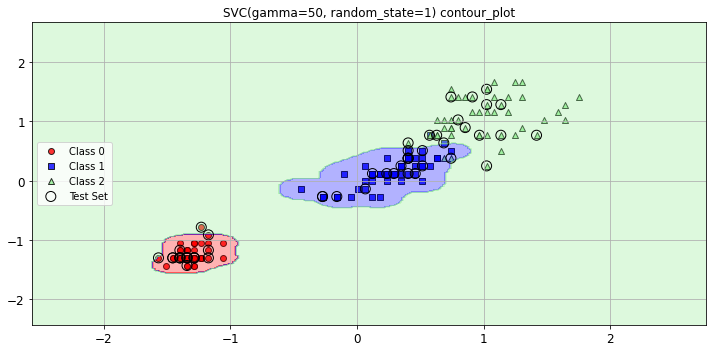

In [12]:
# A RBF Classifier, increasing gamma leads to a bumpier decision boundary close to the
# Training Samples
svm_rbf = SVC(kernel = 'rbf', gamma = 50, C = 1.0, random_state = 1)
svm_rbf_clf = svm_rbf.fit(X_train_scaled, y_train)

plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = svm_rbf_clf,
                     test_idx = range(100,150))

#### The SVC linear classifier with a Sklearn Pipeline

(Does not work properly) To be analyzed

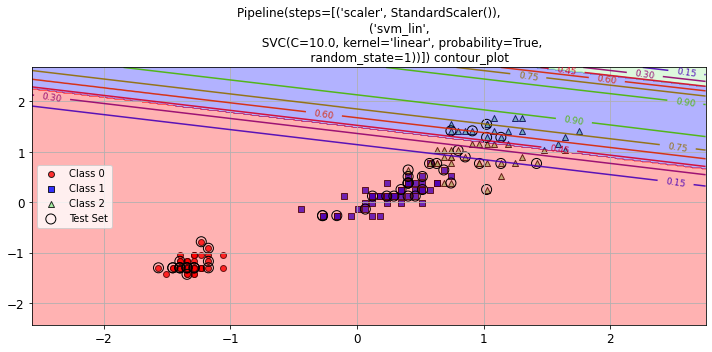

In [13]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import LinearSVC
# Load the iris dataset
iris = datasets.load_iris()
X_iris_new = iris.data[:,(2,3)]
y_iris_new = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris_new, y_iris_new, test_size = 0.3, \
                                                          stratify = y_iris_new, random_state = 42)
svm_lin_pipe = Pipeline([("scaler", StandardScaler()),
                        ("svm_lin",SVC(kernel = 'linear', C = 10., random_state = 1,probability = True)),
                        ])

svm_lin_clf = svm_lin_pipe.fit(X_train, y_train)

plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = svm_lin_clf,
                     test_idx = range(100,150))

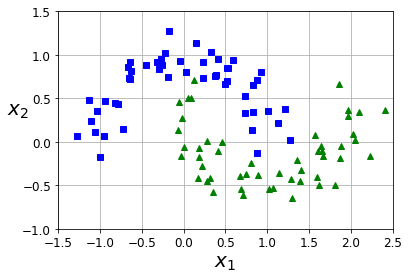

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [15]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

c:\programdata\miniforge3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

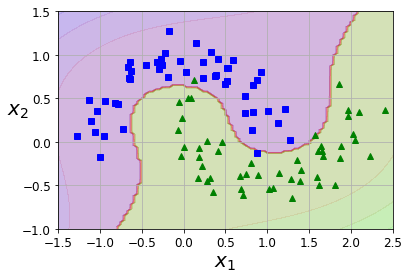

In [16]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

### Decision Trees

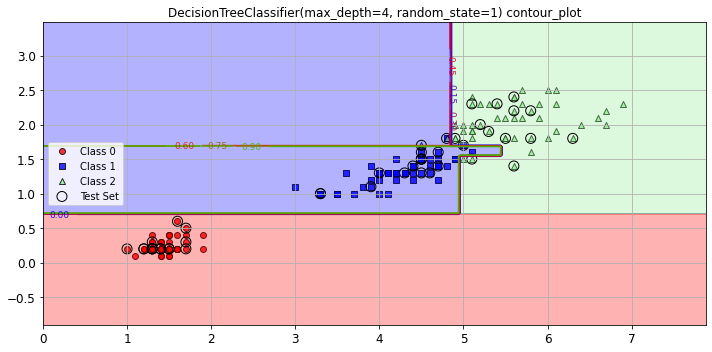

In [17]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)

# No need to scale
iris_tree.fit(X_train,y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                     y_combined,
                     classifier = iris_tree,
                     test_idx = range(105,150))

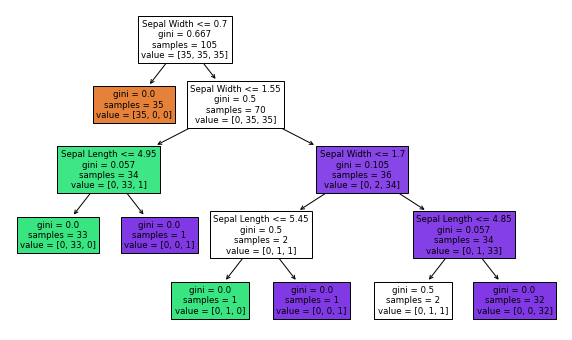

In [18]:
from sklearn import tree

features_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
plt.figure(figsize=(10, 6))
tree.plot_tree(iris_tree, feature_names = features_names, filled =True)

plt.show()

### Random Forest Classifier

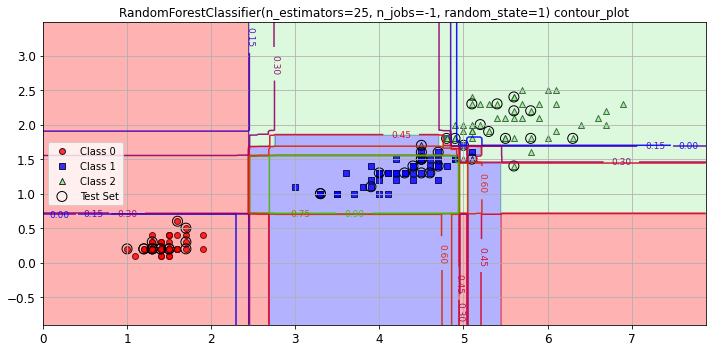

In [19]:
from sklearn.ensemble import RandomForestClassifier

iris_forest = RandomForestClassifier(n_estimators = 25, random_state = 1, n_jobs = -1)

# No need to scale
iris_forest.fit(X_train, y_train)

plot_decision_regions(X_combined,
                     y_combined,
                     classifier = iris_forest,
                     test_idx = range(105,150))

#### Assessing Feature Importance with RandomForest

One nice add from RandomForest methodology is that is able to provide feature importance from the dataset. 

In [25]:
# Estimator for all features
iris_forest_all = RandomForestClassifier(n_estimators = 500, random_state = 1, n_jobs = -1)

# No need to scale
iris_forest_all.fit(iris.data, iris.target)
importances = iris_forest_all.feature_importances_

for name, score in zip(iris.feature_names,importances):
    print(name,score)


sepal length (cm) 0.0939313339940746
sepal width (cm) 0.020823592458343487
petal length (cm) 0.43492786096440594
petal width (cm) 0.45031721258317586


In [34]:
indices = np.argsort(importances)[::-1]
indices

array([3, 2, 0, 1], dtype=int64)

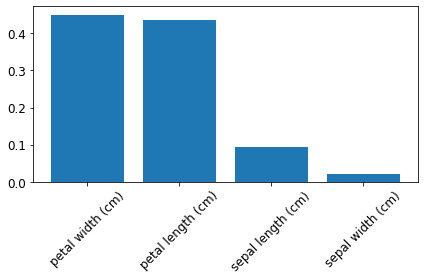

In [42]:

plt.bar(range(iris.data.shape[1]), importances[indices], align = 'center')
plt.xticks(range(iris.data.shape[1]), [iris.feature_names[i] for i in indices],rotation = 45)
plt.tight_layout()
plt.show()

### K-nearest Neighbour


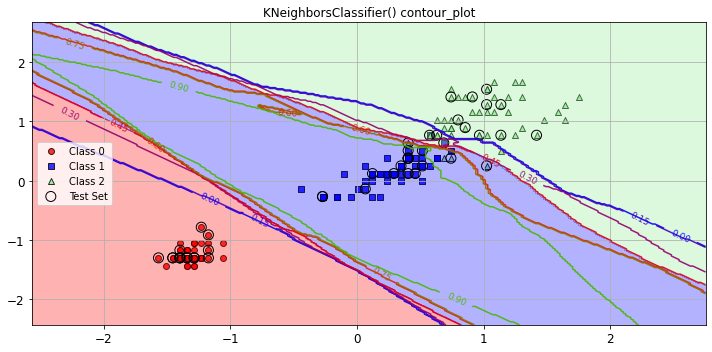

In [20]:
from sklearn.neighbors import KNeighborsClassifier

iris_knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')

# KNN needs scaling
iris_knn.fit(X_train_scaled, y_train)

plot_decision_regions(X_combined_scaled,
                     y_combined,
                     classifier = iris_knn,
                     test_idx = range(105,150))